In [74]:
'''
This project use machine learning model: support vector machine to classify whether a tumor is benign or malignant
based on the features of the cells. The data set contains 30 features of the cell such as radius, texture, area and
it has a dummy variable 0 or 1 representing whether it is benign or malignant.
'''

'\nThis project use machine learning model: support vector machine to classify whether a tumor is benign or malignant\n'

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

In [77]:
#load cancer data from scikit-learn package
data_cancer = load_breast_cancer()

X = data_cancer['data']
y = data_cancer['target']
#combine the data into a dataframe
df_cancer = pd.DataFrame(np.c_[X, y], columns= np.append(data_cancer['feature_names'], 'target'))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


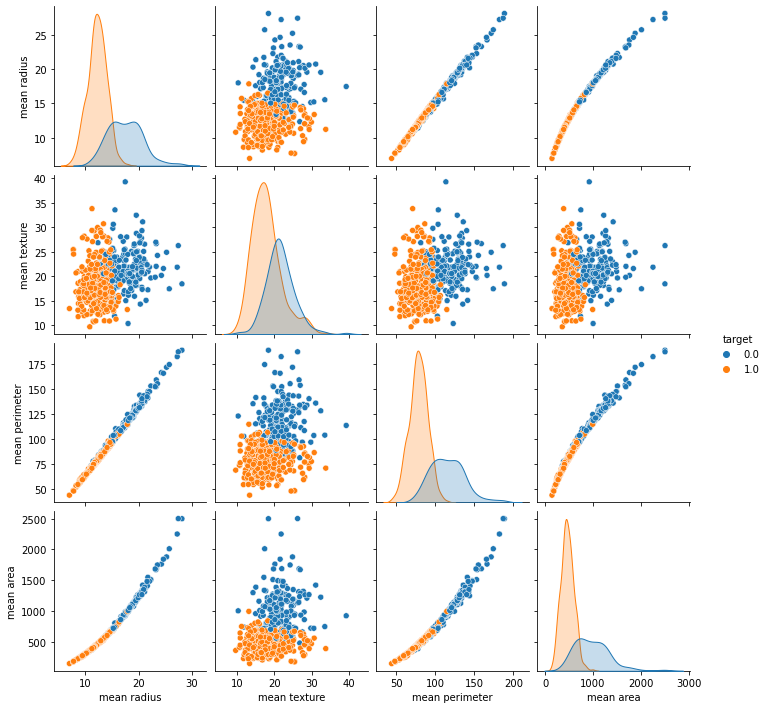

In [78]:
#explore the dataset
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area'])

In [79]:
#drop na
df_cancer

#extract X and Y from df_cancer
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [80]:
#scale the data
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train = (X_train - min_train)/range_train

min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test = (X_test - min_test)/range_test

In [81]:
#Model training
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<AxesSubplot:>

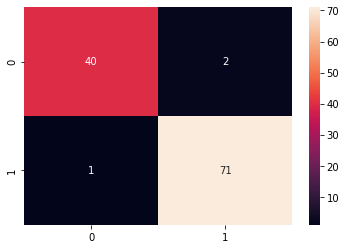

In [82]:
#model evaluation
prediction = svc_model.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True)

In [83]:
#classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        42
         1.0       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [84]:
#Improve model
#grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END ...............C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.01, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=5)

In [85]:
#best parameter
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

<AxesSubplot:>

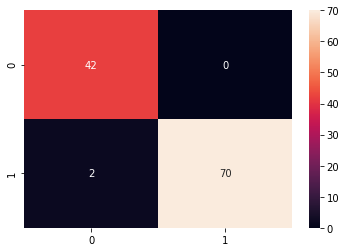

In [86]:
prediction_grid = grid.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, prediction_grid)
sns.heatmap(cm, annot=True)

In [87]:
#classification report
print(classification_report(y_test, prediction_grid))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        42
         1.0       1.00      0.97      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

